<a href="https://colab.research.google.com/github/cheng-cs/1-2-1/blob/main/CMPSC_310_Activity8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Activity 8: Classification Example**

In [27]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# importing different imports that we need to run our code
import numpy as np



70,000 hand written digits as our data sets

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

using the mnist data sets that are public to the user

when using fetch, you will get a pandas data frame, since we don't want pandas dataframe we wanted a array. To overcome this we use `as_frame=False`


In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

`70000` images 

each image have `784` features

In [25]:
y.shape

(70000,)

you can look at individual output by doing something like this

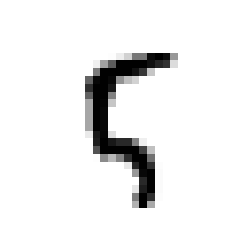

In [12]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[100]
plot_digit(some_digit)
plt.show()

In [11]:
y[100]

'5'

using the matplotlib to plot our data, 

our methods takes in data, we set our settings (plt,axis and imshow)

then we plot


In [28]:
y = y.astype(np.uint8)

In [16]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

spliting our data into training and testing 

In [17]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

y train == true for all 5 or false 

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5) 
# fit == training

sgd? this algorithm can handle big data sets

In [ ]:
sgd_clf.predict([some_digit])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

PERFORMANCE METRIC

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) # predict == testing 

In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

NameError: ignored

false positive is a type 1 error

false neg == type 2 error

In [35]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[60000]])

In [38]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

NameError: ignored

In [39]:
recall_score(y_train_5, y_train_pred)

NameError: ignored

In [40]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

NameError: ignored